### EXP 01: Harvard Stimulation Data _ Harnow
A marketing domain dataset


In [1]:
# This script shows how to call `run_domain_detector`
# and save / print the results with detailed history visualization

import os
import sys
import json
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# # ------------------------------------------------------------------
# # 1. Make sure Python can find your agent package / module
# #    (adapt the path if your repo layout is different)
# # ------------------------------------------------------------------
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(ROOT_DIR)

from agents.d2insight_agent_sys import run_domain_detector   # noqa: E402

/Users/zhangran/Desktop/BP@UnitedStates/Code/D2D_Data2Dashboard/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def visualize_history(result):
    """
    Visualize the domain detection history across iterations.
    
    Args:
        result: The result from run_domain_detector
    """
    if not result or "history" not in result or not result["history"]:
        print("No history data available")
        return
    
    # Convert history to DataFrame for easier manipulation
    history_df = pd.DataFrame(result["history"])
    
    # Print a nice tabular summary
    print("\n=== DOMAIN DETECTION HISTORY ===")
    
    for i, entry in enumerate(result["history"]):
        iteration = entry.get("iteration", i)
        print(f"\n📊 ITERATION {iteration}")
        print(f"📌 Domain: {entry.get('domain', 'Unknown')}")
        
        # Format scores if they exist
        scores = entry.get("scores", {})
        if scores:
            print("📈 Scores:")
            for score_name, score_value in scores.items():
                stars = "★" * score_value + "☆" * (4 - score_value)
                print(f"   {score_name.ljust(15)}: {stars} ({score_value}/4)")
                
        # Print analysis snippet
        analysis_head = entry.get("analysis_head", "")
        if analysis_head:
            print(f"📝 Analysis: {analysis_head}...")
            
    # Plot score evolution if more than one iteration with scores
    scored_entries = [entry for entry in result["history"] if entry.get("scores")]
    if len(scored_entries) > 1:
        plt.figure(figsize=(10, 6))
        
        # Prepare data for plotting
        iterations = []
        score_data = {}
        
        for entry in scored_entries:
            iter_num = entry.get("iteration", 0)
            iterations.append(iter_num)
            
            for score_name, score_value in entry.get("scores", {}).items():
                if score_name not in score_data:
                    score_data[score_name] = []
                score_data[score_name].append(score_value)
        
        # Plot each score metric
        for score_name, values in score_data.items():
            plt.plot(iterations, values, marker='o', label=score_name)
            
        plt.title("Evolution of Scores Across Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Score (0-4)")
        plt.ylim(0, 4.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.xticks(iterations)  # Set x-axis ticks to integer iterations
        plt.show()

def run_and_visualize(csv_path, max_cycles=5):
    """
    Run domain detector and visualize results with history.
    
    Args:
        csv_path: Path to the CSV file
        max_cycles: Maximum number of improvement cycles
    
    Returns:
        The complete result from the domain detector
    """
    print(f"🚀 Running domain detector on {csv_path} with max_cycles={max_cycles}")
    
    # Run the domain detector
    result = run_domain_detector(csv_path, max_cycles)
    
    # Visualize history
    visualize_history(result)
    
    # Print final results
    if "analysis" in result:
        analysis = result["analysis"]
        print("\n=== FINAL RESULTS ===")
        print(f"✅ Domain: {analysis.get('domain', 'Unknown')}")
        print(f"✅ Core Concepts: {', '.join(analysis.get('core_concepts', []))}")
        
        if "analysis" in analysis:
            print("\n📊 DESCRIPTIVE ANALYSIS:")
            print(analysis["analysis"].get("descriptive", ""))
            
            print("\n🔮 PREDICTIVE ANALYSIS:")
            print(analysis["analysis"].get("predictive", ""))
            
            print("\n🌐 DOMAIN-RELATED ANALYSIS:")
            print(analysis["analysis"].get("domain_related", ""))
    
    return result

🚀 Running domain detector on https://drive.google.com/uc?export=download&id=1JhsgpIulCv8Q9NPTZGhrz5-y_RUufMoO with max_cycles=5
Successfully read CSV: 3117 rows, 19 columns
Data profile built successfully
Starting analysis with max_cycles=5
domain_node {'profile': {'raw': {'n_rows': 3117, 'n_cols': 19, 'columns': {'Current Period': {'dtype': 'int64', 'unique_ratio': 0.0003, 'sample': ['9', '9', '9', '9', '9'], 'min': np.int64(9), 'max': np.int64(9), 'mean': np.float64(9.0), 'std': np.float64(0.0)}, 'Customer ID': {'dtype': 'int64', 'unique_ratio': 1.0, 'sample': ['1432', '1433', '1447', '1448', '1449'], 'min': np.int64(1432), 'max': np.int64(4548), 'mean': np.float64(2990.0), 'std': np.float64(899.9447)}, 'Periods Active': {'dtype': 'int64', 'unique_ratio': 0.0045, 'sample': ['1', '14', '4', '1', '2'], 'min': np.int64(1), 'max': np.int64(14), 'mean': np.float64(1.9673), 'std': np.float64(1.7232)}, 'Current Customer (Y/N)': {'dtype': 'object', 'unique_ratio': 0.0006, 'sample': ['N', 'Y'

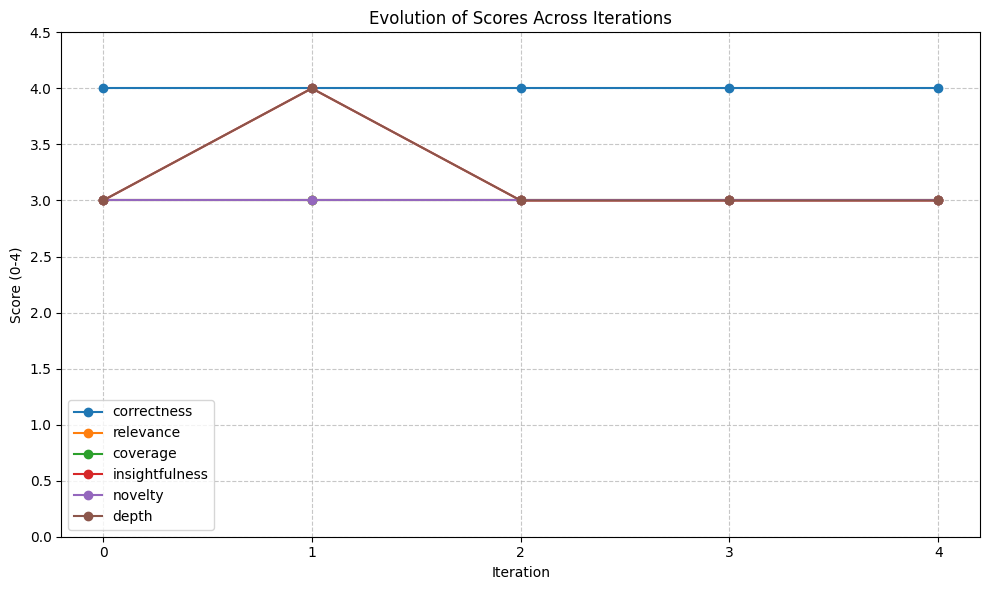


=== FINAL RESULTS ===
✅ Domain: Customer Relationship Management (CRM)
✅ Core Concepts: Customer Lifetime Value (CLV), Customer Segmentation, Customer Retention Strategies, Data-Driven Marketing, Customer Feedback Analysis, Omnichannel Customer Experience

📊 DESCRIPTIVE ANALYSIS:
The dataset provides a comprehensive view of customer interactions and financial metrics within a CRM framework. Notably, the 'Current Customer (Y/N)' column indicates a significant churn rate, with many customers no longer active. The 'Revenue, Total' and 'Expected CLV' columns show a wide variance, suggesting diverse customer value profiles. The 'Acquisition Channel' and 'Region' columns highlight the importance of understanding customer demographics and acquisition strategies, with 'External' channels and 'Southeast' regions being prominent.

🔮 PREDICTIVE ANALYSIS:
Analyzing the 'Expected CLV' alongside 'Periods Active' and 'Acquisition Channel' can help predict future customer value and retention likeliho

{'profile': {'raw': {'n_rows': 3117,
   'n_cols': 19,
   'columns': {'Current Period': {'dtype': 'int64',
     'unique_ratio': 0.0003,
     'sample': ['9', '9', '9', '9', '9'],
     'min': np.int64(9),
     'max': np.int64(9),
     'mean': np.float64(9.0),
     'std': np.float64(0.0)},
    'Customer ID': {'dtype': 'int64',
     'unique_ratio': 1.0,
     'sample': ['1432', '1433', '1447', '1448', '1449'],
     'min': np.int64(1432),
     'max': np.int64(4548),
     'mean': np.float64(2990.0),
     'std': np.float64(899.9447)},
    'Periods Active': {'dtype': 'int64',
     'unique_ratio': 0.0045,
     'sample': ['1', '14', '4', '1', '2'],
     'min': np.int64(1),
     'max': np.int64(14),
     'mean': np.float64(1.9673),
     'std': np.float64(1.7232)},
    'Current Customer (Y/N)': {'dtype': 'object',
     'unique_ratio': 0.0006,
     'sample': ['N', 'Y', 'N', 'N', 'N']},
    'Period Acquired': {'dtype': 'int64',
     'unique_ratio': 0.0045,
     'sample': ['-5', '-5', '-4', '-4', '-4']

In [3]:
# Example usage:
result = run_and_visualize("https://drive.google.com/uc?export=download&id=1JhsgpIulCv8Q9NPTZGhrz5-y_RUufMoO", max_cycles=5)

result

In [5]:
# If you want to save the results to a file:
from agents.d2insight_agent_sys import NumpyEncoder


with open("exp01_d2insight_sys_stimhartnow_output.json", "w") as f:
    json.dump(result, f, indent=2, cls=NumpyEncoder)